In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings 
warnings.filterwarnings('ignore')

In [2]:


df = pd.read_csv(r"C:\Users\haral\Downloads\archive (10)\age_gender.csv")
df = shuffle(df)
df.head()

,age,ethnicity,gender,img_name,pixels
17860,5,3,0,20161220221842826.jpg.chip.jpg,252 252 252 250 234 123 35 43 85 89 99 102 107...
7241,26,2,0,20170116181322065.jpg.chip.jpg,27 25 29 48 58 75 96 113 117 129 145 154 160 1...
13981,36,1,1,20170116222904910.jpg.chip.jpg,14 18 42 56 42 38 52 62 67 93 101 94 49 32 37 ...
5608,25,3,0,20170104230227202.jpg.chip.jpg,63 62 60 55 57 64 63 59 57 63 91 112 121 130 1...
551,1,2,0,20161219195258747.jpg.chip.jpg,16 7 30 101 126 130 136 133 134 134 134 135 13...


In [3]:
num_pixels = len(df['pixels'][0].split(" "))
img_height = int(np.sqrt(len(df['pixels'][0].split(" "))))
img_width = int(np.sqrt(len(df['pixels'][0].split(" "))))
print(num_pixels, img_height, img_width)

2304 48 48


In [4]:
df['pixels'] = df['pixels'].apply(lambda x: np.array(x.split(),dtype='float32'))

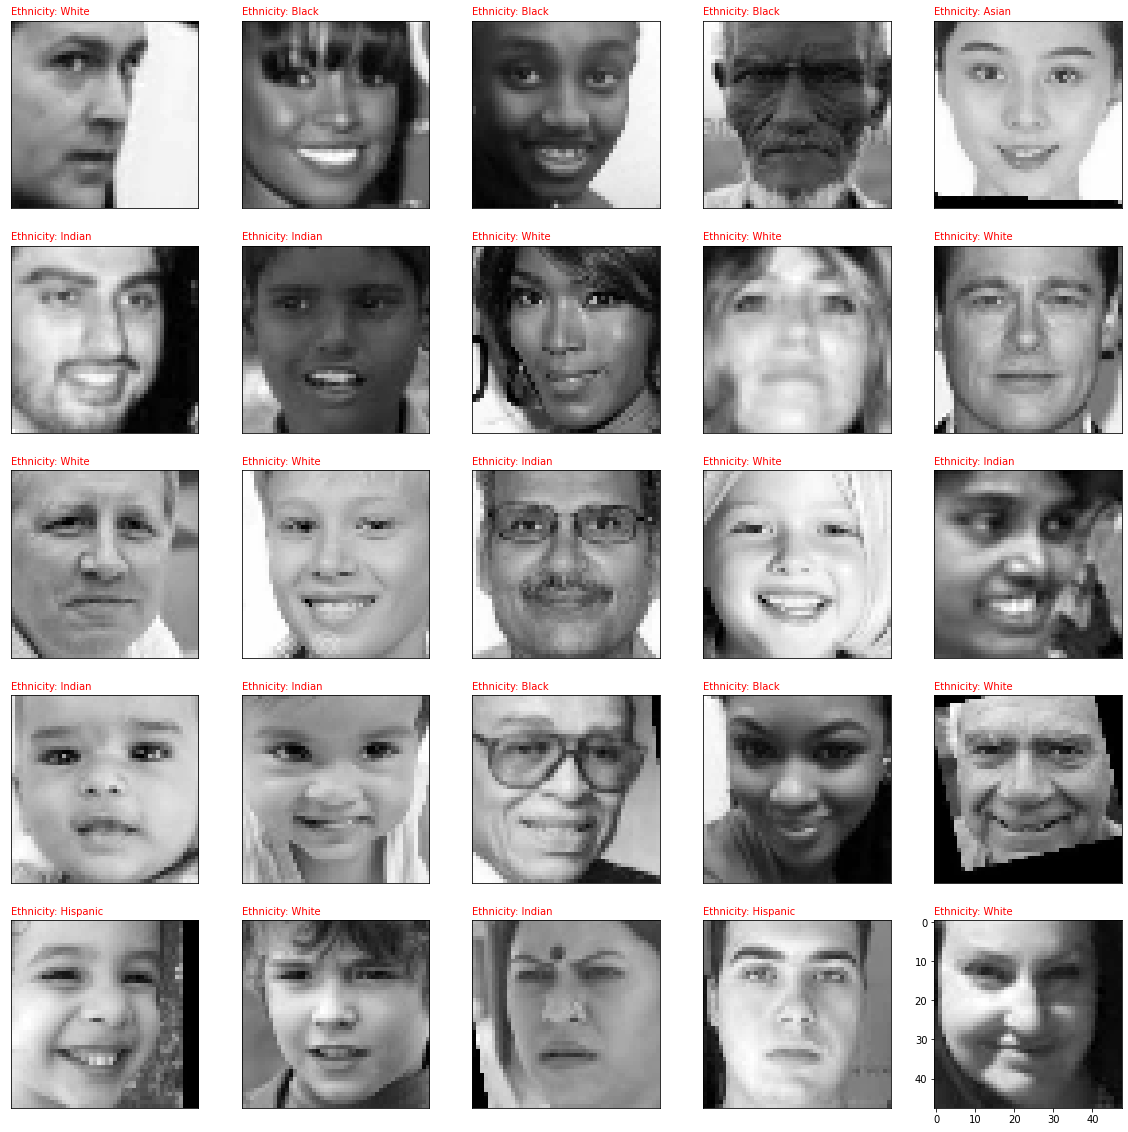

In [29]:
plt.figure(figsize=(20, 20))

for i in range(25):  
    index = np.random.randint(0, len(df))
    plt.xticks([])
    plt.yticks([])   
    plt.grid(False)
    plt.subplot(5, 5, i+1)
    plt.imshow(df['pixels'].iloc[index].reshape(48, 48),"gray")
    plt.title('Ethnicity: {}'.format({0:"White", 1:"Black", 2:"Asian", 3:"Indian", 4:"Hispanic"}[df['ethnicity'].iloc[index]]), loc="left", color='red',fontsize = 10)

plt.show()

In [6]:
X = np.array(df['pixels'].tolist())
X = np.reshape(X, (-1, 48, 48,1))
y = df['age']
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X, y, test_size=0.3, random_state=44)

In [8]:
earlystop=EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_acc',
    patience= 3,
    verbose=1,
)
callbacks = [earlystop, learning_rate_reduction]

In [10]:
y = df['ethnicity']
X_train_ethnicity, X_test_ethnicity, y_train_ethnicity, y_test_ethnicity = train_test_split(X, y, test_size=0.3, random_state=44)

In [11]:
train_generator_ethnicity =train_datagen.flow(
    X_train_ethnicity ,y_train_ethnicity ,batch_size=64
)

test_generator_ethnicity =test_datagen.flow(
    X_test_ethnicity ,y_test_ethnicity ,batch_size=64
)

In [12]:
model_ethnicity = Sequential()

model_ethnicity.add(Conv2D(16,(3,3), padding='same',activation='relu',input_shape=(48,48,1)))
model_ethnicity.add(MaxPooling2D(2,2))

model_ethnicity.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model_ethnicity.add(MaxPooling2D(2,2))

model_ethnicity.add(Conv2D(64,(3,3), padding='same',activation='relu'))
model_ethnicity.add(MaxPooling2D(2,2))


model_ethnicity.add(Flatten())
model_ethnicity.add(Dense(128,activation='relu'))


model_ethnicity.add(Dense(5,activation='softmax'))

model_ethnicity.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_ethnicity.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 64)        

In [13]:
model_ethnicity.fit(
    train_generator_ethnicity, 
    epochs= 10,
    validation_data= test_generator_ethnicity,
    callbacks= callbacks
)

Epoch 1/10
260/260 [==============================] - 14s 53ms/step - loss: 1.1770 - accuracy: 0.5460 - val_loss: 0.9113 - val_accuracy: 0.6805 - lr: 0.0010
Epoch 2/10
260/260 [==============================] - 13s 52ms/step - loss: 0.8605 - accuracy: 0.6935 - val_loss: 0.7893 - val_accuracy: 0.7290 - lr: 0.0010
Epoch 3/10
260/260 [==============================] - 13s 52ms/step - loss: 0.7571 - accuracy: 0.7352 - val_loss: 0.7707 - val_accuracy: 0.7286 - lr: 0.0010
Epoch 4/10
260/260 [==============================] - 14s 52ms/step - loss: 0.6997 - accuracy: 0.7562 - val_loss: 0.7357 - val_accuracy: 0.7442 - lr: 0.0010
Epoch 5/10
260/260 [==============================] - 13s 52ms/step - loss: 0.6502 - accuracy: 0.7747 - val_loss: 0.6742 - val_accuracy: 0.7663 - lr: 0.0010
Epoch 6/10
260/260 [==============================] - 14s 52ms/step - loss: 0.6061 - accuracy: 0.7872 - val_loss: 0.6727 - val_accuracy: 0.7733 - lr: 0.0010
Epoch 7/10
260/260 [==============================] - 13s 

In [30]:
acc=model_ethnicity.evaluate(test_generator_ethnicity)

112/112 [==============================] - 1s 13ms/step - loss: 0.6647 - accuracy: 0.7711


<AxesSubplot:title={'center':'Ethnicity'}>

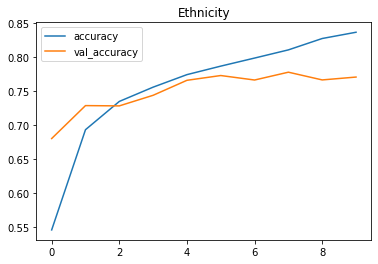

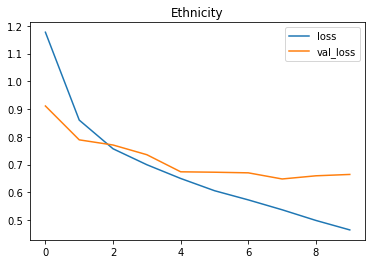

In [14]:
losses_ethnicity = pd.DataFrame(model_ethnicity.history.history)
losses_ethnicity[['accuracy','val_accuracy']].plot(title='Ethnicity')
losses_ethnicity[['loss','val_loss']].plot(title='Ethnicity')